In [1]:
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")
import networkx as nx
import random
import os
from os import listdir
import numpy as np
import tools.graph_processing as gp
import tools.plotly_extension as tp
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import tools.graph_visu as gv
import slam.io as sio

In [2]:
# G = nx.complete_graph(10)
# nx.draw(G)
# len(G.edges())

In [3]:
# edge_to_remove = random.sample(list(G.edges),22)
# G.remove_edges_from(edge_to_remove)
# len(G.edges())

In [4]:
mypath = "/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/ten_thous/0/noise_1200,outliers_16/graphs"

In [5]:
def plot_edge_rmv(x,y,label):
    plt.plot(x, y,marker="o", label=label)
    plt.xlabel("Mean across all the nodes")
    plt.ylabel("Percentage of edges removed")
    plt.legend(loc="upper left")
    plt.show()

In [6]:
def edge_len_threshold(G,thr):
    
    edge_to_add = random.sample(list(graph.edges),round(len(graph.edges)*thr))

    return edge_to_add


removal percentage: 0.0
removal percentage: 0.03
removal percentage: 0.05
removal percentage: 0.07
removal percentage: 0.09
removal percentage: 0.1


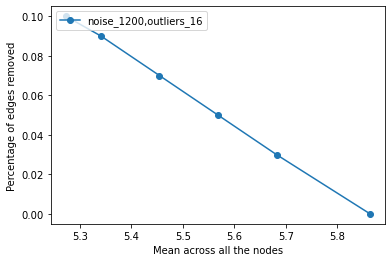

In [7]:
per_rmv = [0.0, 0.03, 0.05,0.07,0.09,0.10] # percentage of edges to remove from simulated graph

mean_degree_simu = list()

for per in per_rmv:

    degree_values = 20
    # real data
    path_to_graphs = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/OASIS_full_batch/modified_graphs'

    # Get the meshes
    list_graphs = gp.load_graphs_in_list(path_to_graphs)
    degree_list = list()
    fig_labels = list()
    for ind, graph in enumerate(list_graphs):
        fig_labels.append('graph_'+str(ind))
        gp.remove_dummy_nodes(graph)
        #print(len(graph.nodes))
        graph.remove_edges_from(nx.selfloop_edges(graph))
        degree_list.append(list(dict(nx.degree(graph)).values()))
    # compute the histos
    degree_histo = np.zeros((len(degree_list), degree_values))
    for i_d, dist in enumerate(degree_list):
        count = np.bincount(dist)
        for i,c in enumerate(count):
            degree_histo[i_d, i] += c
        degree_histo[i_d, :] = degree_histo[i_d, :]/np.sum(count)
    # lines for the plot
    x = list(range(degree_values))
    y = np.mean(degree_histo, 0)
    y_upper = y + np.std(degree_histo, 0)
    y_lower = y - np.std(degree_histo, 0)
    # error plot from real data
    fig_c = tp.error_plot(x=x, y=y, y_lower=y_lower, y_upper=y_upper, line_label='degree real data', color='rgb(20, 20, 200)')

    #simulated graphs
    path_to_graphs = mypath
    # Get the meshes


    list_graphs = gp.load_graphs_in_list(path_to_graphs)
    degree_list_simu = list()
    fig_labels = list()
    for ind, graph in enumerate(list_graphs):
        fig_labels.append('simu_graph_'+str(ind))
        gp.remove_dummy_nodes(graph)

        # Remove edges
        edge_to_remove = edge_len_threshold(graph,per)
        graph.remove_edges_from(edge_to_remove)

        if nx.is_connected(graph) == False:

            print("found disconnected components")

        graph.remove_edges_from(nx.selfloop_edges(graph))
        degree_list_simu.append(list(dict(nx.degree(graph)).values()))
    # compute the histos
    degree_histo = np.zeros((len(degree_list_simu), degree_values))
    for i_d, dist in enumerate(degree_list_simu):
        count = np.bincount(dist)
        for i,c in enumerate(count):
            degree_histo[i_d, i] += c
        degree_histo[i_d, :] = degree_histo[i_d, :]/np.sum(count)
    # lines for the plot
    y = np.mean(degree_histo, 0)
    y_upper = y + np.std(degree_histo, 0)
    y_lower = y - np.std(degree_histo, 0)
    # error plot from real data
    fig_c2 = tp.error_plot(x=x, y=y, y_lower=y_lower, y_upper=y_upper, line_label='degree simus', color='rgb(200, 20, 20)')
    fig_c.extend(fig_c2)
    fig = go.Figure(fig_c)


    fig.update_layout(
        yaxis_title='proportion',
        title="noise_1200,outliers_16"+"_removal_percentage_"+str(per),
        hovermode="x"
    )
    #fig.show(renderer="browser")
    fig.write_html('first_figure.html', auto_open=True)

    degree_flatten = [elem for lists in degree_list_simu for elem in lists]
    mean_degree_simu.append(np.mean(degree_flatten))

    print("removal percentage:",per)

plot_edge_rmv(mean_degree_simu,per_rmv,"noise_1200,outliers_16")


    #simu_node_density(path_to_graphs,"noise_1200,outliers_16")